In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [2]:
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df=pd.read_csv('../data/기상대기정보.csv')

In [4]:
df.columns

Index(['지점명', '일시', '지점', '기온(°C)', '강수여부', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)', '전운량(10분위)', 'PM10',
       'PM2.5', 'Ozon', 'NO2', 'CO', 'SO2', '증기압(hPa)', '이슬점온도(°C)', '시정(10m)',
       '지면온도(°C)', '월', '전날기온'],
      dtype='object')

In [5]:
# 기온을 종속변수로 지정
y = df['기온(°C)'].copy()
X = df[df.columns[4:]].copy()

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


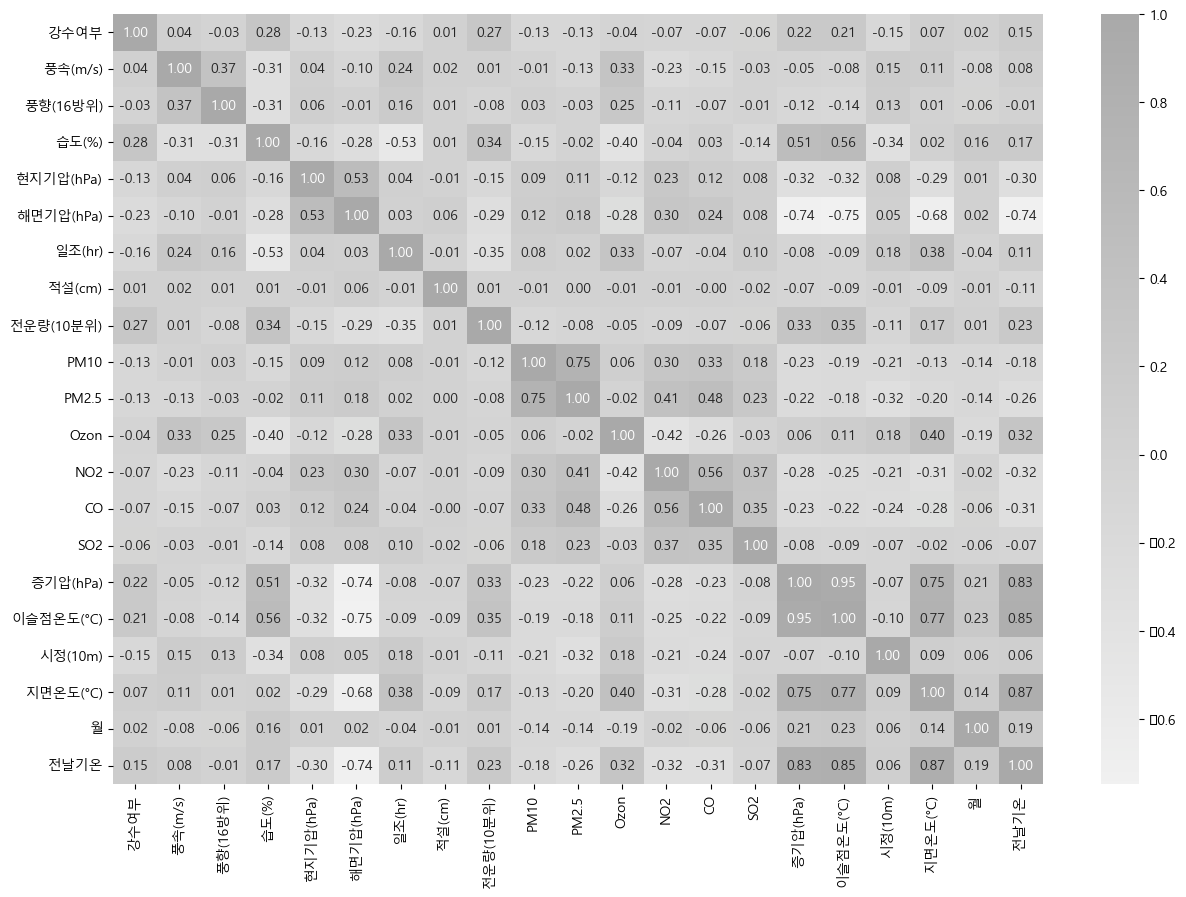

In [6]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap=cmap)

In [6]:
# 범위형 변수 제거
X.drop(columns=['풍향(16방위)', '전운량(10분위)', '월'], axis=1, inplace=True)

In [7]:
# 더미변수 생성
X=pd.get_dummies(data=X, columns=['강수여부'])

In [8]:
scaler = StandardScaler()
scaler.fit(X.iloc[:,:-2])
X_scaled = scaler.transform(X.iloc[:,:-2])
X_scaled = pd.concat([pd.DataFrame(X_scaled), X.iloc[:,-2:]], axis=1)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,강수여부_0,강수여부_1
0,-0.543789,0.446784,-1.147573,-1.434567,-0.645615,-0.070183,-0.019538,-0.005901,-0.525180,-0.874219,-0.547369,-1.069525,1.997825,1.491758,-0.335595,1.010295,1.163569,1,0
1,-0.725001,0.724630,-1.134416,-1.398730,-0.645615,-0.070183,0.151909,0.123778,-0.472111,-0.874219,-0.547369,-1.069525,2.055110,1.517753,-0.482683,0.937277,1.084297,1,0
2,-0.906213,0.817246,-1.114681,-1.362894,-0.645615,-0.070183,-0.053827,-0.031837,-0.472111,-0.874219,-1.048907,-1.069525,1.974912,1.483093,-0.711672,0.888599,1.024842,1,0
3,-0.543789,1.002477,-1.108102,-1.339002,-0.645615,-0.070183,-0.019538,-0.005901,-0.472111,-0.966011,-1.048907,-1.069525,2.055110,1.517753,-0.667378,0.848034,1.034751,1,0
4,-0.785405,0.956169,-1.075209,-1.291220,-0.645615,-0.070183,0.151909,0.123778,-0.631320,-0.966011,-1.048907,-1.069525,2.100937,1.535083,-0.496890,0.823694,0.955478,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933328,-0.362577,-0.942446,1.247015,1.515993,-0.645615,-0.070183,-0.705324,-0.524617,0.217797,-0.415259,0.455707,0.057103,-1.015333,-1.133756,2.571060,-1.204574,-0.966888,1,0
1933329,-0.241769,-0.710908,1.247015,1.527938,-0.645615,-0.070183,-0.671035,-0.489956,0.058587,-0.139884,0.455707,0.057103,-0.980963,-1.038440,1.854007,-1.269479,-0.956979,1,0
1933330,-0.181365,-0.525677,1.279908,1.587666,-0.645615,-0.070183,-0.602456,-0.489956,0.217797,-0.507051,0.455707,0.057103,-0.958049,-0.977785,1.162862,-1.318158,-1.165070,1,0
1933331,-0.302173,-0.386754,1.253594,1.539884,-0.645615,-0.070183,-0.533877,-0.421113,0.217797,-0.507051,0.455707,0.057103,-0.969506,-1.021110,1.062574,-1.391175,-1.244343,1,0


In [9]:
X_scaled.columns = ['풍속(m/s)', '습도(%)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)', 'PM10', 'PM2.5', 
                    'O3', 'NO2', 'CO', 'SO2', '증기압(hPa)', '이슬점온도(°C)', '시정(10m)', '지면온도(°C)', '전날기온', 
                    '강수여부_0', '강수여부_1']

In [11]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif

,VIF Factor,features
0,1.282309,풍속(m/s)
1,6.320862,습도(%)
2,1.508060,현지기압(hPa)
3,3.590444,해면기압(hPa)
4,2.194224,일조(hr)
5,1.026503,적설(cm)
6,2.388285,PM10
7,2.954487,PM2.5
8,2.230331,O3
9,2.190011,NO2


In [10]:
# vif가 가장 높은 이슬점온도(°C) 제거
X_scaled.drop(columns=['이슬점온도(°C)'], axis=1, inplace=True)

In [13]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif

,VIF Factor,features
0,1.281795,풍속(m/s)
1,3.286031,습도(%)
2,1.505447,현지기압(hPa)
3,3.554252,해면기압(hPa)
4,2.164950,일조(hr)
5,1.021423,적설(cm)
6,2.386741,PM10
7,2.952684,PM2.5
8,2.137354,O3
9,2.120578,NO2


C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


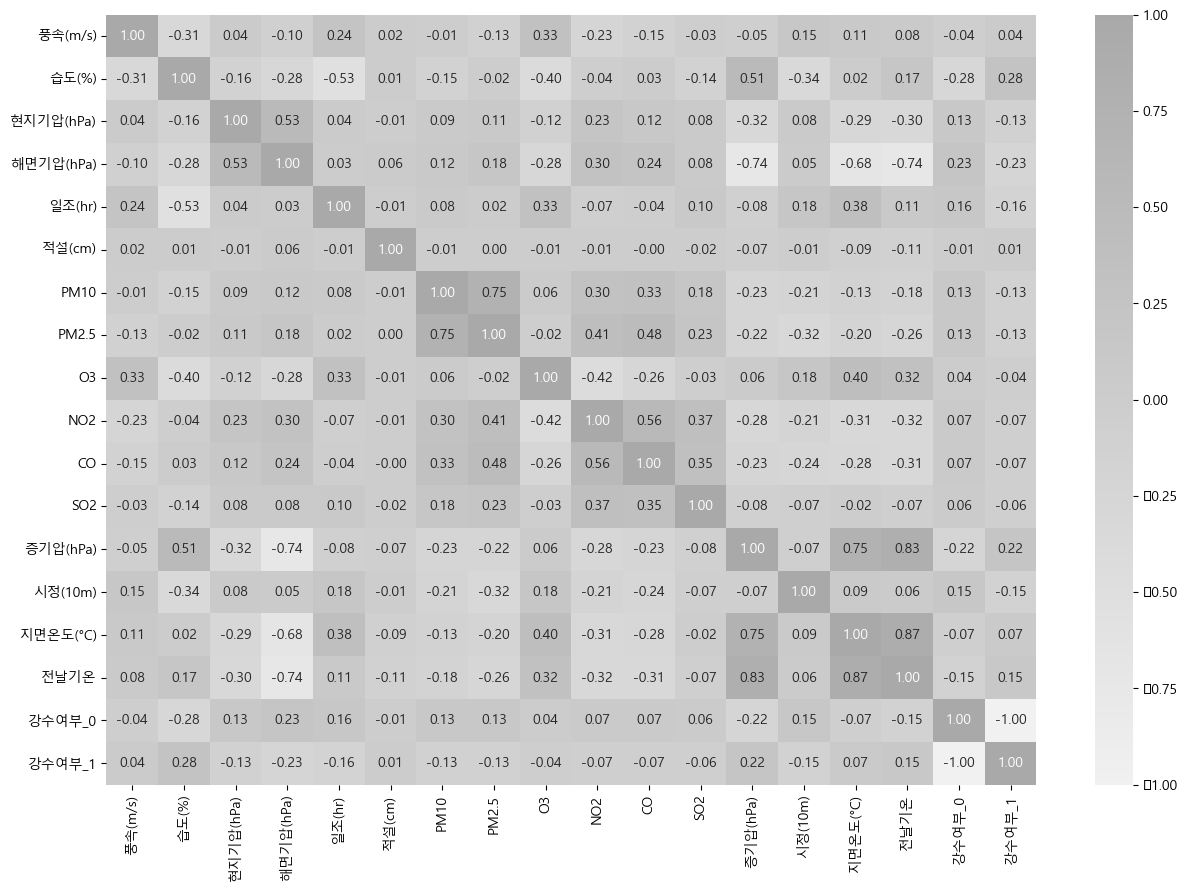

In [14]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [11]:
# 상관계수가 높은 증기압(hPa) 제거
X_scaled.drop(columns=['증기압(hPa)'], axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


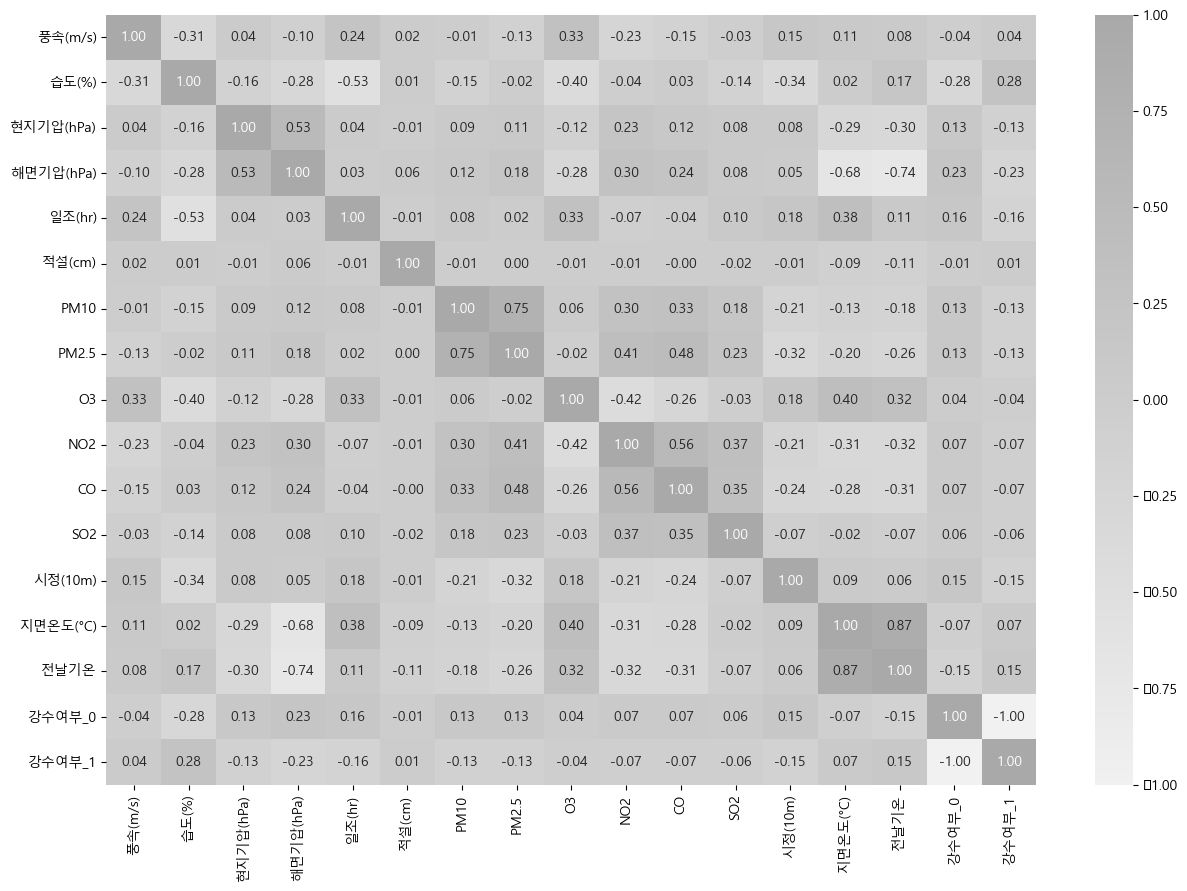

In [16]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [12]:
# 상관계수가 높은 지면온도(°C) 제거
X_scaled.drop(columns=['지면온도(°C)'], axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


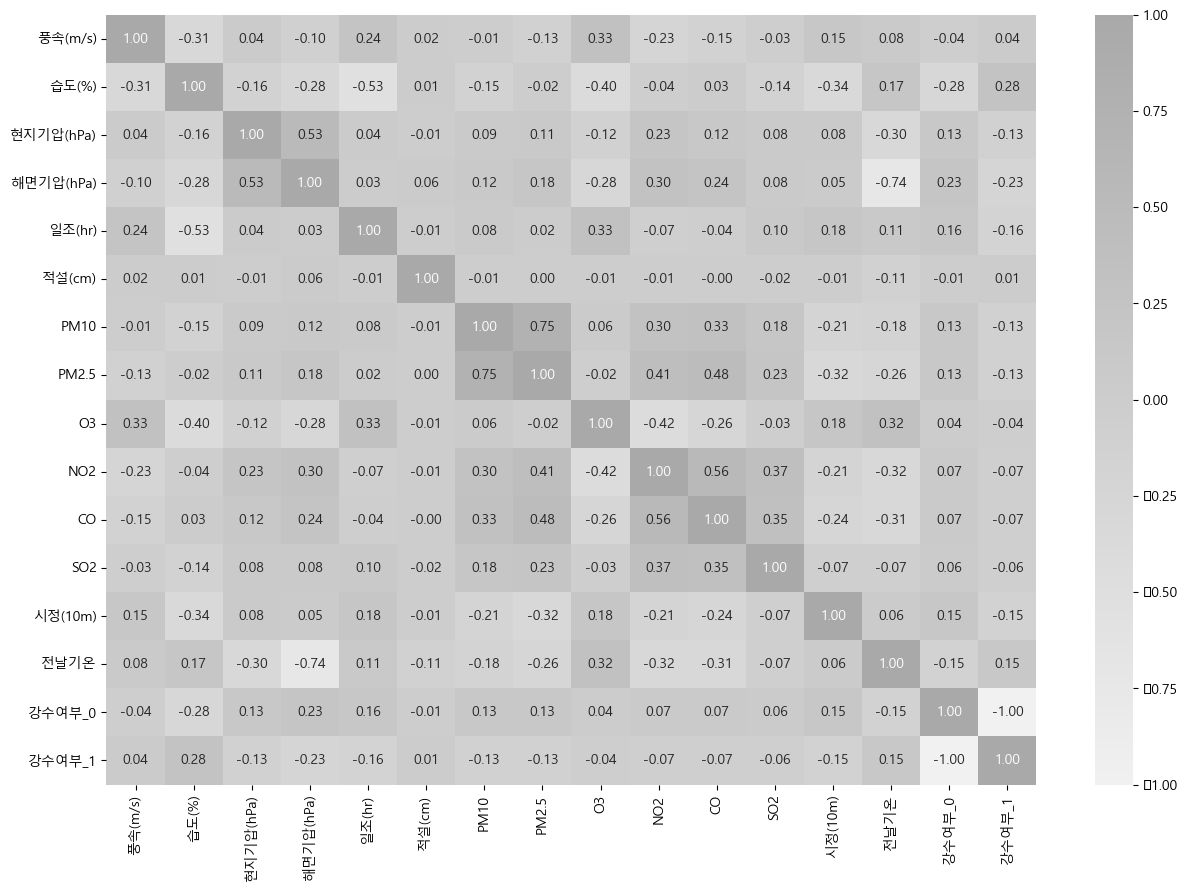

In [18]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [13]:
# 상관계수가 높은 PM2.5 제거
X_scaled.drop(columns=['PM2.5'], axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


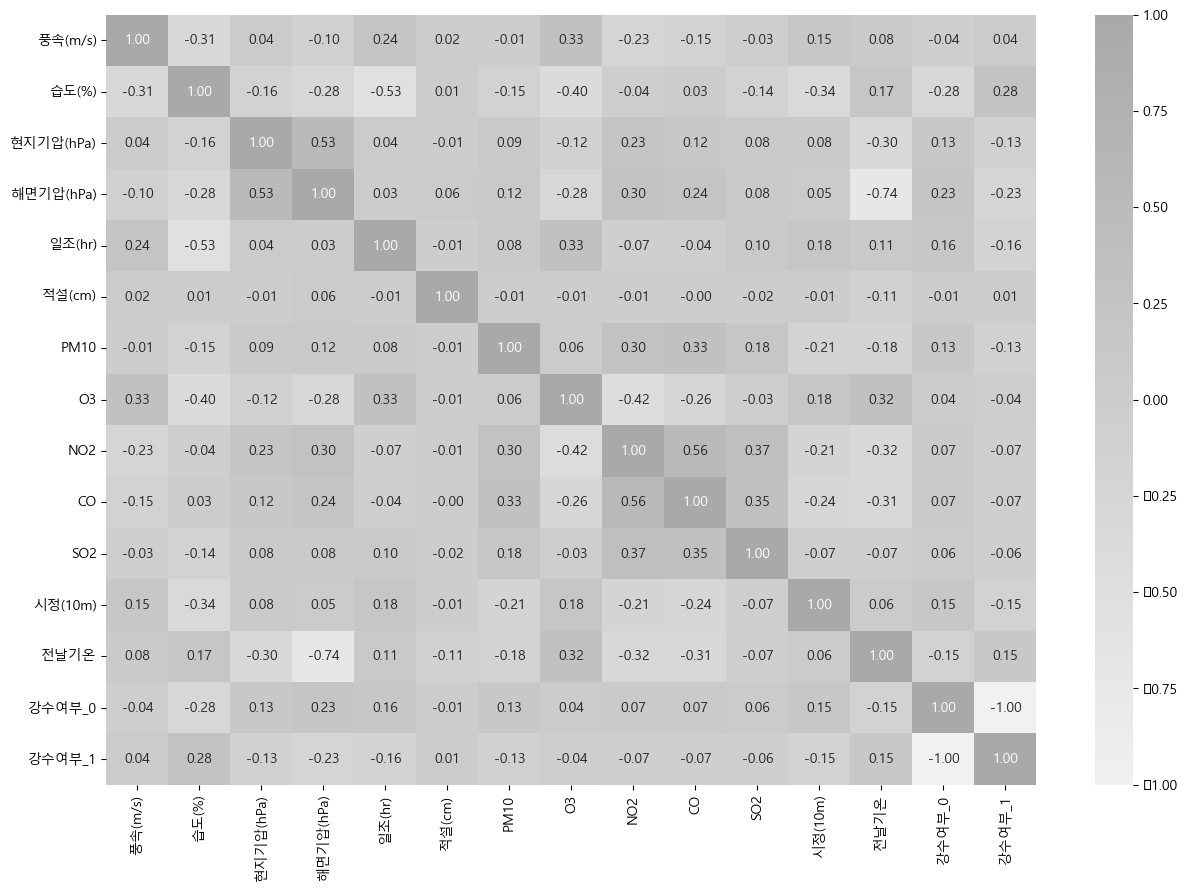

In [20]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [14]:
# 상관계수가 높은 해면기압(hPa) 제거
X_scaled.drop(columns=['해면기압(hPa)'], axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


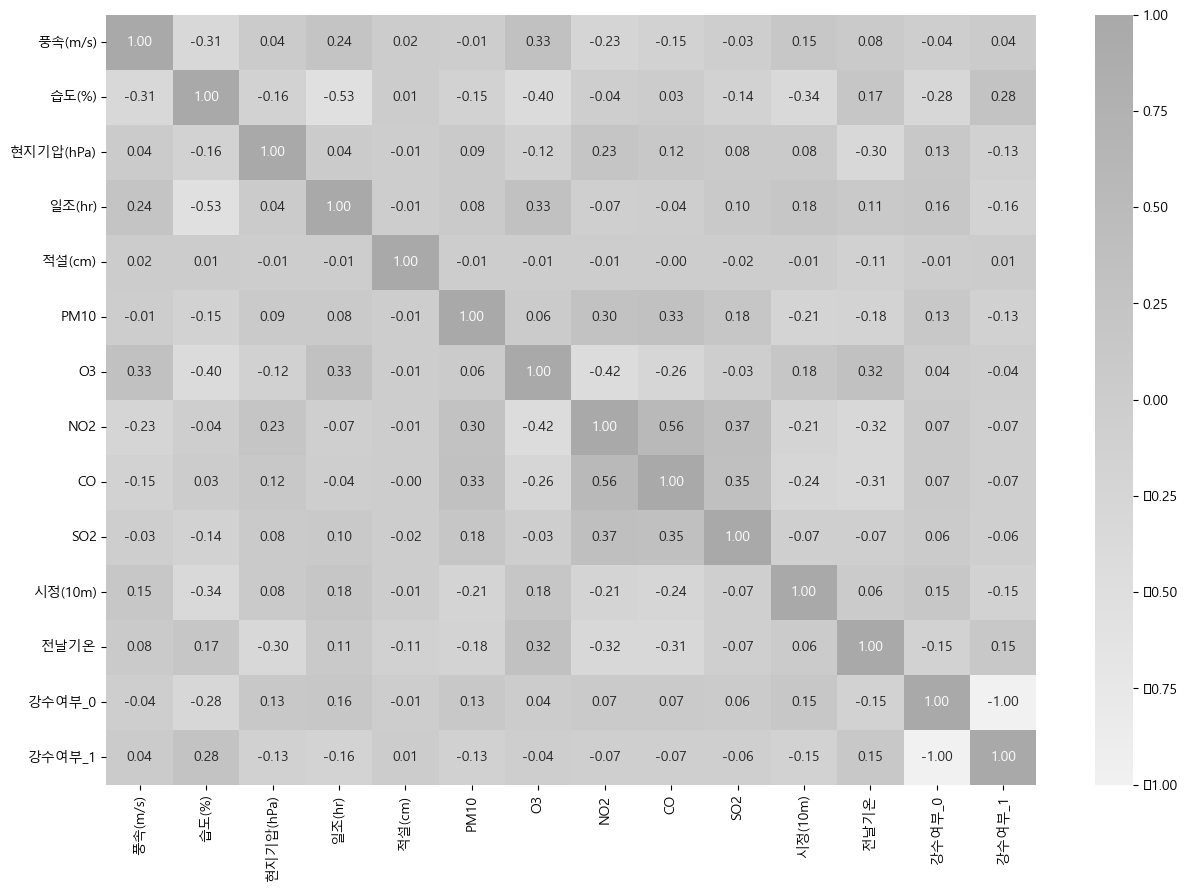

In [22]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [15]:
model = sm.OLS(y, X_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 기온(°C)   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.159e+06
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:19:36   Log-Likelihood:            -5.1113e+06
No. Observations:             1933333   AIC:                         1.022e+07
Df Residuals:                 1933319   BIC:                         1.022e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
풍속(m/s)       -0.2208      0.003    -81.232      0.000      -0.226      -0.215
습도(%)          0.4484      0.004    122.040      0.000       0.441       0.456
현지기압(hPa)     -0.3626      0.003   -137.109      0.000      -0.368      -0.357
일조(hr)         0.8652      0.003    288.239      0.000       0.859       0.871
적설(cm)        -0.1095      0.002    -44.298      0.000      -0.114      -0.105
PM10           0.0112      0.003      4.055      0.000       0.006       0.017
O3             0.7676      0.003    229.587      0.000       0.761       0.774
NO2            0.4047      0.003    115.702      0.000       0.398       0.412
CO            -0.0795      0.003    -25.136      0.000      -0.086      -0.073
SO2            0.1357      0.003     49.537      0.000       0.130       0.141
시정(10m)        0.0102      0.003      3.649      0.000       0.005       0.016
전날기온           9.0517      0.003   2990.126      0.000       9.046       9.058
강수여부_0        13.2997      0.003   5242.274      0.000      13.295      13.305
강수여부_1        12.6012      0.011   1191.828      0.000      12.581      12.622
==============================================================================
Omnibus:                   177400.946   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1198512.012
Skew:                          -0.145   Prob(JB):                         0.00
Kurtosis:                       6.846   Cond. No.                         7.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
print(X_train.shape, X_test.shape, X_val.shape)

(1391999, 14) (386667, 14) (154667, 14)


In [18]:
%%time
lin_reg = LinearRegression()
model_lin = lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

CPU times: total: 2.94 s
Wall time: 870 ms


3.4071507092372784

In [19]:
print('훈련용:',model_lin.score(X_train, y_train))
print('검증용:',model_lin.score(X_test, y_test))

훈련용: 0.886206635097972
검증용: 0.8858739327650216


In [20]:
%%time
# 결정나무모델
tree_reg = DecisionTreeRegressor(criterion = 'squared_error', 
                                 splitter='best',
                                 max_depth=14,
                                 min_samples_leaf=10,
                                 random_state=0)
model_tree = tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

CPU times: total: 7.97 s
Wall time: 7.96 s


3.14786680742729

In [21]:
print('훈련용:',model_tree.score(X_train, y_train))
print('검증용:',model_tree.score(X_test, y_test))

훈련용: 0.9104048293242206
검증용: 0.902582975640571


In [22]:
%%time
# 랜덤포레스트
forest_reg=RandomForestRegressor(random_state=0, n_jobs=-1) #CPU full 사용
model_forest = forest_reg.fit(X_train, y_train)
y_pred=forest_reg.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test, y_pred))
rms

CPU times: total: 55min 28s
Wall time: 3min 43s


2.8014384768822653

In [23]:
print('훈련용:',model_forest.score(X_train, y_train))
print('검증용:',model_forest.score(X_test, y_test))

훈련용: 0.9891286153134787
검증용: 0.9228449526989116


In [24]:
%%time
#RandomizedSearchCV() 최근에 많이 사용되고 있는 파라미터 최적화 함수
#매개변수의 범위를 지정해주면 무작위로 매개변수를 조합하여 최적의 성능 측정
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={
 'n_estimators': randint(low=1, high=100),
 'max_features': randint(low=1, high=8),
 }
rnd_search=RandomizedSearchCV(forest_reg, param_distributions=param_distribs, cv=5, random_state=2)
rnd_search.fit(X_train, y_train)

CPU times: total: 55min 19s
Wall time: 28min 16s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026460775A60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026401D350A0>},
                   random_state=2)

In [25]:
cvres=rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9494020395762193 {'max_features': 1, 'n_estimators': 16}
0.9608224078491167 {'max_features': 6, 'n_estimators': 73}
0.960028107225755 {'max_features': 7, 'n_estimators': 44}
0.9616441390617363 {'max_features': 3, 'n_estimators': 76}
0.9415765602155161 {'max_features': 1, 'n_estimators': 8}
0.9612396148750093 {'max_features': 3, 'n_estimators': 50}
0.9616339016083106 {'max_features': 4, 'n_estimators': 86}
0.9596902415089246 {'max_features': 3, 'n_estimators': 21}
0.9604609364752975 {'max_features': 5, 'n_estimators': 38}
0.9516193955970892 {'max_features': 4, 'n_estimators': 5}


In [26]:
%%time
model_RSCV_forest=rnd_search.best_estimator_
y_pred=model_RSCV_forest.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test, y_pred))
rms

CPU times: total: 1min 44s
Wall time: 7.31 s


2.7263270951729

In [27]:
print('훈련용:',model_RSCV_forest.score(X_train, y_train))
print('검증용:',model_RSCV_forest.score(X_test, y_test))
print('예측용:',model_RSCV_forest.score(X_val, y_val))

훈련용: 0.9895306843754185
검증용: 0.9269268073037014
예측용: 0.9274562523504829


In [16]:
# 인공신경망
model = Sequential()
model.add(Dense(56, input_shape=(len(X_train.columns),), activation='relu', name='input'))
model.add(Dense(28, activation='relu', name='hidden-1'))
model.add(Dense(14, activation='relu', name='hidden-2'))
model.add(Dense(7, activation='relu', name='hidden-3'))
model.add(Dense(1, name='output')) #항등함수
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 56)                840       
                                                                 
 hidden-1 (Dense)            (None, 28)                1596      
                                                                 
 hidden-2 (Dense)            (None, 14)                406       
                                                                 
 hidden-3 (Dense)            (None, 7)                 105       
                                                                 
 output (Dense)              (None, 1)                 8         
                                                                 
Total params: 2,955
Trainable params: 2,955
Non-trainable params: 0
_________________________________________________________________


In [17]:
%%time
np.random.seed(5)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)
hist = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
34800/34800 [==============================] - 530s 15ms/step - loss: 10.1681 - mse: 10.1681 - mae: 2.3542 - val_loss: 9.3379 - val_mse: 9.3379 - val_mae: 2.2749
Epoch 2/500
34800/34800 [==============================] - 572s 16ms/step - loss: 9.3007 - mse: 9.3007 - mae: 2.2742 - val_loss: 9.1158 - val_mse: 9.1158 - val_mae: 2.2488
Epoch 3/500
34800/34800 [==============================] - 568s 16ms/step - loss: 9.1818 - mse: 9.1818 - mae: 2.2599 - val_loss: 9.2212 - val_mse: 9.2212 - val_mae: 2.2870
Epoch 4/500
34800/34800 [==============================] - 564s 16ms/step - loss: 9.0986 - mse: 9.0986 - mae: 2.2491 - val_loss: 9.0273 - val_mse: 9.0273 - val_mae: 2.2440
Epoch 5/500
34800/34800 [==============================] - 568s 16ms/step - loss: 9.0469 - mse: 9.0469 - mae: 2.2432 - val_loss: 9.0029 - val_mse: 9.0029 - val_mae: 2.2222
Epoch 6/500
34800/34800 [==============================] - 571s 16ms/step - loss: 8.9991 - mse: 8.9991 - mae: 2.2368 - val_loss: 8.9800 - 

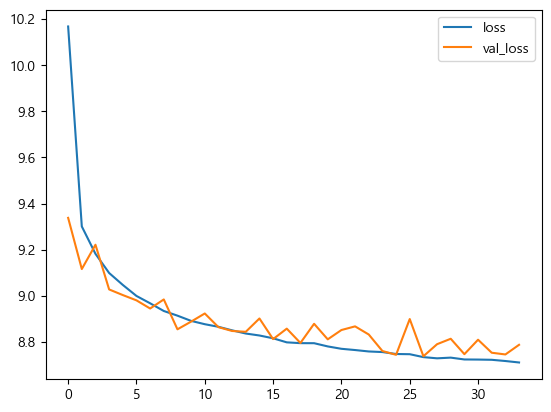

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

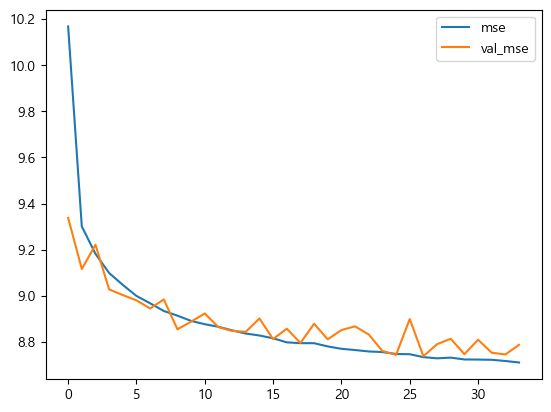

In [19]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse', 'val_mse'])
plt.show()

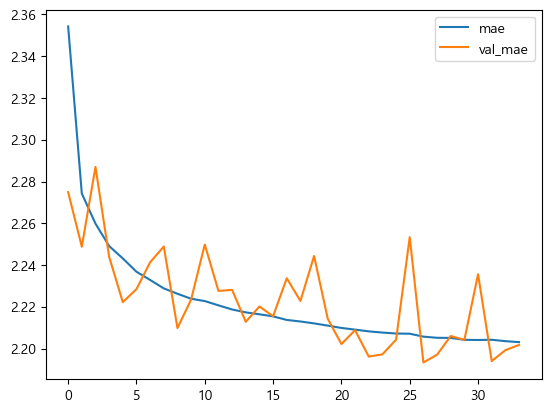

In [20]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.show()

In [21]:
scores = model.evaluate(X_train, y_train)
print(scores)
scores = model.evaluate(X_test, y_test)
print(scores)

43500/43500 [==============================] - 388s 9ms/step - loss: 8.7126 - mse: 8.7126 - mae: 2.1946
[8.712552070617676, 8.712552070617676, 2.1945810317993164]
12084/12084 [==============================] - 106s 9ms/step - loss: 8.7842 - mse: 8.7842 - mae: 2.2008
[8.784239768981934, 8.784239768981934, 2.2007851600646973]


In [22]:
from sklearn.metrics import r2_score
pred = model.predict(X_test)
r2_score(y_test, pred)

12084/12084 [==============================] - 57s 5ms/step


0.9136412129234297